<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Evaluación de Modelos de Regresión </h2> 

---

# Introducción

Siempre que se desarrolle un modelo, debemos tener algún tipo de medida que nos permita saber qué tan bueno es el modelo, de tal manera que podamos comparar con otros modelos, hacer mejoras, etc.

En esta sección veremos distintas medidas que son usadas frecuentemente en el caso de modelos de regresión.

# Métricas

## Error Absoluto Medio

El **Error Absoluto Medio**, comunmente conocido como **MAE** por sus siglas en inglés (Mean Absolute Error). Está definido matemáticamente de la siguiente manera:

$$ \mbox{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_{i}-\hat{y_i}|$$

Es una métrica que tiene muchas ventajas, ya que por un lado, está en las misma unidades que la variable objetivo y por otro lado se poco sensible a los valores extremos, lo que la hace robusta.

## Error Cuadrático Medio

Esta métrica es similar a la anterior, solamente que ahora se toma el cuadrado de las diferencias. Se conoce por sus sigles en inglés como MSE (Mean Squared Error)

$$ \mbox{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{y_i})^{2}$$

tiene un problema relacionado con la interpretación de los resultados ya que el valor ese el cuadrado de las unidad de la variable objetivo. Por ejemplo si esta variable representa dolares, entonces estariamos hablando de dolares al cuadrado, lo cual no tiene mucho sentido a la hora de darle una interpretación

## Raíz del Error Cuadrático Medio

Esta medida resuelve el problema que se comentó con respecto a la metrica anterior. Viene dada por la raíz cuadrada del error cuadrático medio. Sus siglas en inglés son RMSE (Root  Mean Squared Error)

$$ \mbox{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{y_i})^2}$$

Uno de los problemas que tiene es que es sensible a los errores grandes.

## Coeficiente de Determinación $R^{2}$

Viene dada por la siguiente expresión matemática

$$r = \frac{n\displaystyle\sum_{i=1}^{n}x_{i}y_{i} - \Bigg(\sum_{i=1}^{n}x_{i}\Bigg)\Bigg(\sum_{i=1}^{n}y_{i}\Bigg)}{\sqrt{n\displaystyle\sum_{i=1}^{n}x_{i}^2-\Big(\sum_{i=1}^{n}x_{i}\Big)^2}\sqrt{n\displaystyle\sum_{i=1}^{n}y_{i}^2-\Big(\sum_{i=1}^{n}y_{i}\Big)^2}}$$

Este coeficiente mide que porcentaje de la varianza de la variable objetivo que se puede explicar por el modelo. Su valor máximo es 1 (cuando el modelo explica toda la varianza), también puede tomar valores negativos en aquellos modelos que funcionen relativamente mal.

Tiene algunas desventaja y es que no considera la complejidad del modelo ni permite saber si existe sobre ajuste.

## Coeficiente de determinación ajustado ##

El coeficiente de determinación ajustado (Adjusted R-squared) tiene la ventaja respecto a la métrica anterior de que si considera la complejidad del modelo.

$$1- \frac{(1-R^{2})(n-1)}{(n-k-1)}$$

donde $n$ es el número de observaciones y $k$ es el número de coeficientes del modelo sin considerar el término independiente.

# Práctica

In [57]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np

### Creamos un dataset sintético de prueba

In [76]:
X, y = make_regression(n_samples=500, n_features = 1, noise = 30)

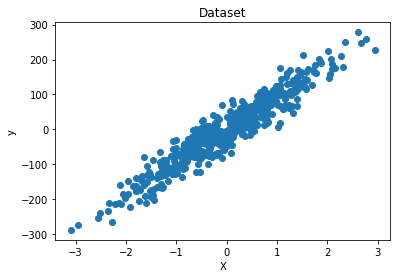

In [91]:
plt.scatter(X,y)
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Creamos un modelo de regresión lineal

In [78]:
model = LinearRegression()

In [79]:
model.fit(X,y)

LinearRegression()

### Determinamos la predicción del modelo

In [80]:
y_predicha = model.predict(X)

#### Representación gráfica del modelo

In [81]:
u = np.linspace(-3,3)

In [82]:
v = model.predict(u[:, np.newaxis])

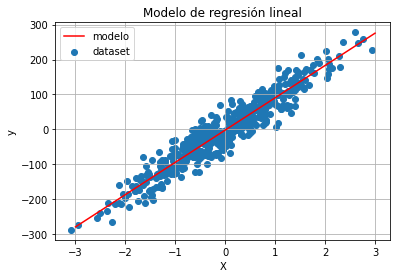

In [93]:
plt.plot(u,v,'r',label='modelo')
plt.scatter(X,y,label='dataset')
plt.title('Modelo de regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Errores

### Error Absoluto Medio

In [75]:
metrics.mean_absolute_error(y,y_predicha)

16.859113729975572

### Error cuadrático medio

In [84]:
metrics.mean_squared_error(y,y_predicha)

874.3762467257296

### Raíz del error cuadrático medio

In [88]:
np.sqrt(metrics.mean_squared_error(y,y_predicha))

29.56985368116876

### Coeficiente $R^2$

In [94]:
r2 = metrics.r2_score(y,y_predicha)
print(r2)

0.9086993045062798


### Coeficiente de determinación ajustado

In [97]:
r2_ajustado = 1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1)
print(r2_ajustado)

0.9085159697763727
